## Pesticides

### Pesticide balance

- cumulated pesticide mass balance error (absolute value)
- cumulated pesticide mass balance error (real value)

In [2]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

from obs_data import *

print(os.getcwd())

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


In [3]:
PC = False
version = "v10"
folder = "1"

In [4]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10/


### Mass balance error $(g.)$

In [5]:
# Mass error
col = "sim"
name_tss = "global_mb_pest"
filename = "resM_" + name_tss + ".tss"

mb_g = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

real = mb_g.sim.cumsum()

absol = mb_g.sim.abs().cumsum()



In [6]:
# Julian days
s = 180
e = 290

In [35]:
dates = getTime(sep=";")
x = dates.Date.tolist()[s:e]
wb = mb_g.sim.tolist()[s:e]
re = real.tolist()[s:e]
ab = absol.tolist()[s:e]

In [28]:
traceWB = go.Scatter(
    x = x,
    y = wb,
    mode = 'lines',
    name = 'Catchment Error (g. S-met)',
    marker=dict(
        color= 'green')
)

traceRE = go.Scatter(
    x = x,
    y = re,
    mode = 'lines',
    name = 'Cumulative Real Error (g. S-met)',
    line = dict(
        color = '#F44336',
        width = 3,
        dash = 'dot')
)

traceAB = go.Scatter(
    x = x,
    y = ab,
    mode = 'lines',
    name = 'Cumulative Absolute Error (g. S-met)',
    line = dict(
        color = '#4527A0',
        width = 3,
        dash = 'dot')
)

layout = go.Layout(
    title='Pest. Balance Errors',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title=r'$g.~S-met$',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

In [33]:
data = [traceWB, traceRE, traceAB]
figname = "ErrorPest.png"

%matplotlib inline
import plotlycred

online = True
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data, layout=layout)
    py.image.save_as(fig, filename=figname)
    # py.plot(fig, filename=figname) # Opens in web
else:
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


### Pest Balance errors $(g.)$

Follow this link to interact with the data:

https://plot.ly/~DayTimeChunks/19/


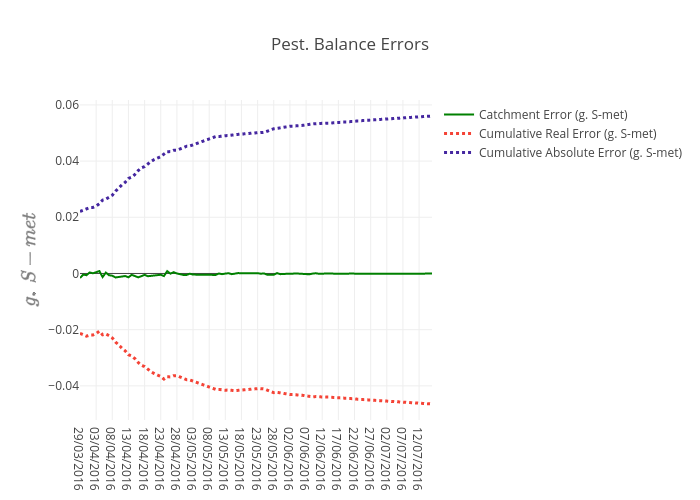

In [34]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)